# Notebook for initial pytrends data
https://pypi.org/project/pytrends/
    
    

In [ ]:
pip install pytrends

In [2]:
import pandas
import matplotlib.pyplot as plt

from collections import Counter
import pytest
## Connect to Google

In [1]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)


In [ ]:
pytrends.suggestions("Libya Democracy")

In [74]:
kw_list = ["Tunisia Democracy", " hi"] #, "Libya Democracy"
pytrends.build_payload(kw_list, cat=None,timeframe='all', geo='US', gprop='') #, cat=0 not included

data = pytrends.interest_over_time()
#x.plot()
data = data[kw_list]
data

,Tunisia Democracy,hi
date,,
2004-01-01,0,71
2004-02-01,0,72
2004-03-01,0,72
2004-04-01,0,70
2004-05-01,0,65
...,...,...
2020-11-01,0,73
2020-12-01,0,77
2021-01-01,0,74


Tunisia Democracy
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 27.333333333333332, 0.0, 0.0, 0.0, 0.0, 0.0, 14.333333333333334, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.333333333333332, 0.0, 0.0, 0.0, 33.333333333333336, 33.0, 19.0, 17.666666666666668, 10.0, 5.0, 0.0, 9.666666666666666, 4.666666666666667, 0.0, 12.666666666666666, 0.0, 16.0, 0.0, 0.0, 4.333333333333333, 21.333333333333332, 9.0, 4.333333333333333, 12.666666666666666, 8.333333333333334, 17.333333333333332, 7.0, 3.3333333333333335, 6.666666666666667, 11.666666666666666, 3.3333333333333335, 6.333333333333333, 15.333333333333334, 6.0, 3.3333333333333335, 3.0, 15.0, 0.0, 3.0, 8.666666666666666, 5.333333333333333, 5.0, 10.0, 7.666666666666667, 5.666666666666667] 68


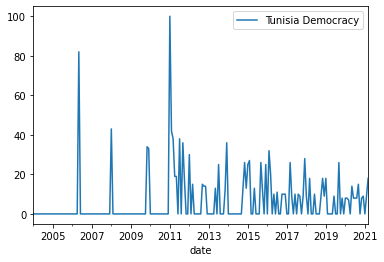

In [72]:
data = pytrends.interest_over_time()
#x.plot()
data = data[kw_list]
data[listToStr][28]
data.plot()
sumtot = 0
counter = 0
listavg = []
for key in data:
    print(key)
    for i in range(len(data[key])-1):
        sumtot += data[key][counter+1]# + data[key][counter+2] + data[key][counter+3]
        #print(i, data[key][counter+1], sumtot)
        listavg.append(sumtot)
        sumtot = 0
        counter = counter + 1
        
#print(listavg)s
counter = 0
sumTemp = 0
listFinal = []
for i in listavg:
    sumTemp += i
    counter += 1
    #print(sumTemp, counter)
    if counter == 3:
        listFinal.append(sumTemp/3)
        sumTemp = 0
        counter = 0


print(listFinal, len(listFinal))

In [66]:
resultsDf = pytrends.interest_over_time() 
resultsDf.reset_index(inplace=True)
x = resultsDf.date
type(x)
y = x[1]
y
times = []
for i in x:
    times.append(x[i])
print(times)

KeyError: Timestamp('2004-01-01 00:00:00')

*get_historical_interest* gets an hourly interest from the specified times. Will not work if you do a large time period as google will block this request. Might be worth to make a function to get hourly interest of a time every year and construct data together. Or just use *interest_over_time*. jk use sleep to be not rate limited. it will take a while, recommend sleep value is 60

In [ ]:
y = pytrends.get_historical_interest(kw_list, year_start=2018, month_start=1, day_start=1, hour_start=0, year_end=2018, month_end=4, day_end=1, hour_end=0, cat=None, geo='', gprop='', sleep=0)
y.plot()

### gprop

What Google property to filter to
Example 'images'
Defaults to web searches
Can be images, news, youtube or froogle (for Google Shopping results)

In [ ]:
x = pytrends.interest_over_time() # Will now do interest over time in hour range
x.plot()

In [ ]:
z = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)
z.plot()

In [ ]:
pytrends.related_queries()

In [ ]:
import plotCountry
import pandas as pd
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360)
countryList = {"Tunisia Democracy"}
plotCountry.pytrendPlot(countryList)
